Trabajo Práctico N° 1 



#Data acquisition

In [18]:
import pandas as pd


In [ ]:
df = pd.read_csv("ionosphere.data",header = None)
print(df)
print(df.shape)

In [ ]:
columnas = list()
for i in range(1,18):
   col1 = "f" + str(i)+"_r"
   col2 = "f" + str(i)+"_i"
   columnas.append(col1)
   columnas.append(col2)


columnas.append("target")
columnas
df.columns = columnas
df.head()

#Pre - processing

In [ ]:
#categorizar target a partir de 0 y 1 (de b o g)
categoriaTarget = {"g": 1, "b":0}
df["target"] = df["target"].map(categoriaTarget) 
df["target"]

#Feature engineering

In [22]:
balanceDeDatos = df["target"].value_counts()
print(balanceDeDatos)

1    225
0    126
Name: target, dtype: int64


In [23]:
counter = 99
dfAux = pd.DataFrame()
for index,row in df.iterrows():
  if(counter>0):
    if(row["target"]==1):
      counter-=1
    else:
       dfAux = dfAux.append(row)
  else:
    dfAux = dfAux.append(row)

In [24]:
dfAux.shape

(252, 35)

In [25]:
balanceDeDatos2 = dfAux["target"].value_counts()
print(balanceDeDatos2)

0.0    126
1.0    126
Name: target, dtype: int64


# Data preparation

In [26]:
features = dfAux.loc[:, dfAux.columns != "target"]
target = dfAux.loc[:, dfAux.columns == "target"]


In [27]:
features.shape

(252, 34)

In [ ]:
#analisis para escalamiento de datos si es necesario
features.min()
features.max()

# Modeling


In [29]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

In [30]:
from keras.models import Sequential
from keras.layers.core import Activation, Dense
import tensorflow as tf

In [64]:
myInputSize = features_train.shape[1]

#arquitectura red neuronal
model = Sequential()
model.add(Dense(20, input_dim = myInputSize))
model.add(Activation("sigmoid"))
model.add(Dense(1))
model.add(Activation("relu"))

#model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[tf.keras.metrics.Accuracy()])
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [65]:

history = model.fit(features_train, target_train, epochs = 20, validation_split = 0.2)

Epoch 1/20
5/5 [==============================] - 1s 54ms/step - loss: 1.3793 - accuracy: 0.4250 - val_loss: 0.6920 - val_accuracy: 0.5610
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 0.8380 - accuracy: 0.5688 - val_loss: 0.6581 - val_accuracy: 0.6585
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 0.7947 - accuracy: 0.6000 - val_loss: 0.6414 - val_accuracy: 0.6585
Epoch 4/20
5/5 [==============================] - 0s 9ms/step - loss: 0.7651 - accuracy: 0.6062 - val_loss: 0.6310 - val_accuracy: 0.6098
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.7429 - accuracy: 0.6438 - val_loss: 0.6226 - val_accuracy: 0.6341
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 0.7251 - accuracy: 0.6562 - val_loss: 0.6109 - val_accuracy: 0.6341
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 0.7070 - accuracy: 0.6562 - val_loss: 0.6041 - val_accuracy: 0.6341
Epoch 8/20
5/5 [=================

In [33]:
from matplotlib import pyplot as plt

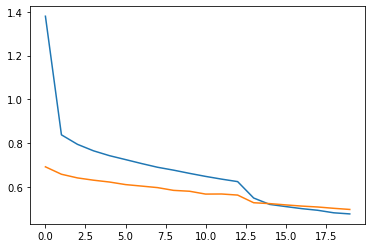

In [66]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

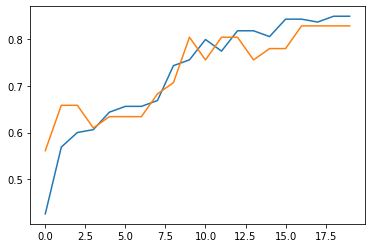

In [67]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

#Classification and validation

In [68]:
yPred = model.predict(features_test)

In [69]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(np.round(yPred), target_test, labels=[0.0, 1.0])

In [70]:
print(cm)

[[19  2]
 [10 20]]
